# K-Means Clustering

## 1. Generate 2D blobs

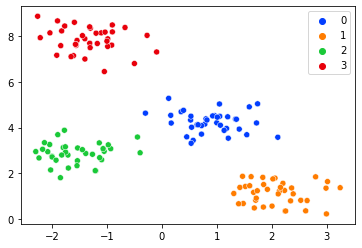

In [23]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

points, categories = make_blobs(n_samples = 150, centers = 4, cluster_std = 0.5, shuffle = True, random_state = 0)
ax = sns.scatterplot(x = points[:,0], y = points[:,1], hue = categories, palette = 'bright')
plt.savefig("clusters.jpg")
plt.show()

## 2. K-Means Clustering

In [24]:
# Needed to reload ATCS_KMeans module in case it has changed
import sys
del sys.modules['ATCS_KMeans']
from ATCS_KMeans import ATCS_KMeans

### 2.1. Randomly Select Cluster Centers

[[-1.0664746   3.07724609]
 [ 1.35678894  4.36462484]
 [ 1.46870582  1.86947425]
 [ 0.78260667  4.15263595]]


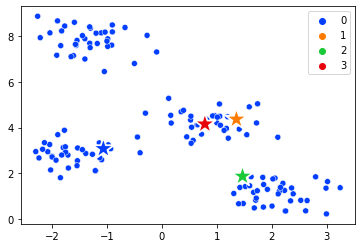

In [25]:
clustering = ATCS_KMeans(points, 4)
clustering.init_centroids_random()
clustering.draw_state()

### 2.2 Assign Points to Cluster Centers

[[-1.0664746   3.07724609]
 [ 1.35678894  4.36462484]
 [ 1.46870582  1.86947425]
 [ 0.78260667  4.15263595]]


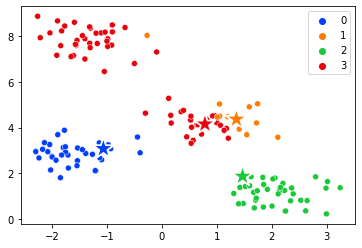

SSE: 778.1094250022845


In [26]:
clustering.classify_points()
clustering.draw_state()
print("SSE:", clustering.calculate_SSE())

### 2.3. Recalculate Cluster Centers

[[-1.55311219  2.87260114]
 [ 1.2969278   4.65793743]
 [ 2.08356978  1.13724593]
 [-0.52023003  6.30334241]]


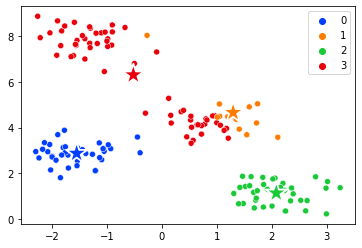

In [27]:
clustering.update_centroids()
clustering.draw_state()

### 2.4 Reassign Points to Cluster Centers

[[-1.55311219  2.87260114]
 [ 1.2969278   4.65793743]
 [ 2.08356978  1.13724593]
 [-0.52023003  6.30334241]]


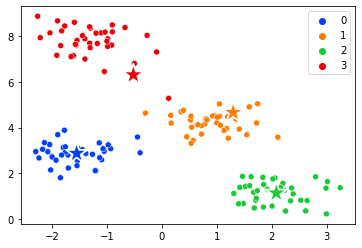

SSE: 194.38362003630763


In [28]:
clustering.classify_points()
clustering.draw_state()
print("SSE:", clustering.calculate_SSE())

### 2.5. Recalculate Cluster Centers

[[-1.55311219  2.87260114]
 [ 1.01055095  4.33400005]
 [ 2.08356978  1.13724593]
 [-0.81315948  6.86020829]]


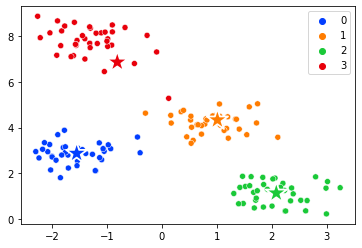

In [29]:
clustering.update_centroids()
clustering.draw_state()

### 2.6. Classification Loop

SSE: 448.211169562662
SSE: 212.25625494134405
SSE: 208.5909263119471
SSE: 206.251223490033
SSE: 204.58488338390765
SSE: 198.3008892029049
SSE: 181.81099081258188
SSE: 158.2273203579697
SSE: 136.95993786599283
SSE: 123.31394085105434
SSE: 115.11022481914065
SSE: 109.12154988814945
SSE: 104.10943167966848
SSE: 100.09534473759258
SSE: 96.6727687763567
SSE: 93.88273159690371
SSE: 91.56077092714777
SSE: 89.59759459123018
SSE: 87.91684900250017
SSE: 86.46308992875561
SSE: 85.19481331496773
SSE: 84.08018398486995
SSE: 83.09429282257754
SSE: 82.21732559390873
SSE: 81.43329983157933
SSE: 80.72916919814284
SSE: 80.0941733368531
SSE: 79.51935632954043
SSE: 78.99720377553263
SSE: 78.52136509100951
SSE: 78.08643816666552
SSE: 77.68780039853415
SSE: 77.32147470234273
SSE: 76.98402225862712
SSE: 76.6724559182145
SSE: 76.38416974224339
SSE: 76.11688126106867
SSE: 75.86858384560638
SSE: 75.6375071820511
SSE: 75.42208428703466
SSE: 75.22092383704232
SSE: 75.03278684255793
SSE: 74.85656689479929
SSE: 74.

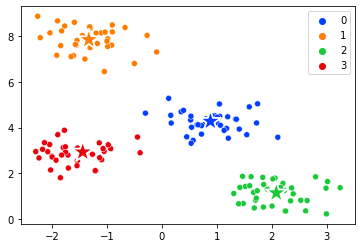

In [30]:
clustering = ATCS_KMeans(points, 4)
clustering.init_centroids_random()
SSE = 0
stop = False
while not stop:
    clustering.classify_points()
    newSSE = clustering.calculate_SSE()
    print("SSE:", newSSE)
    clustering.update_centroids()
    if abs(newSSE - SSE) < 0.01:
        stop = True
    SSE = newSSE
clustering.draw_state()

## 3. How to Increase Robustness?
### 3.1. Multiple Initializations

Iteration:  0
SSE: 802.1128977150512
SSE: 530.9885430300917
SSE: 517.5028902602354
SSE: 496.279988967695
SSE: 451.44791381259313
SSE: 384.20211757331515
SSE: 319.25976525331475
SSE: 270.19659841826365
SSE: 235.23593834693045
SSE: 209.55563716941896
SSE: 189.77846281386388
SSE: 173.82589067240042
SSE: 160.82324816356117
SSE: 149.69437267083762
SSE: 140.53957834058676
SSE: 132.90908267523108
SSE: 126.47751816309928
SSE: 121.00349885564407
SSE: 116.30429768733295
SSE: 112.23924734468416
SSE: 108.69848519159126
SSE: 105.59511616230793
SSE: 102.8596352211308
SSE: 100.43588377392426
SSE: 98.27807069277851
SSE: 96.34854630755513
SSE: 94.61611780271981
SSE: 93.05475963678653
SSE: 91.64261599018054
SSE: 90.36122168638849
SSE: 89.19488834499705
SSE: 88.13021675516146
SSE: 87.15570656307337
SSE: 86.26144163258215
SSE: 85.43883472211078
SSE: 84.68041900458181
SSE: 83.97967683944003
SSE: 83.33089836472581
SSE: 82.72906410798149
SSE: 82.16974705658212
SSE: 81.64903058082767
SSE: 81.16343933929198
SS

SSE: 230.13493707772622
SSE: 229.08377772472753
SSE: 228.11520958137172
SSE: 227.22075704234646
SSE: 226.39295630567022
SSE: 225.61593637311444
SSE: 224.8942481102247
SSE: 224.2227364332777
SSE: 223.5968359072406
SSE: 223.01249118452455
SSE: 222.46608976577866
SSE: 221.9544049353663
SSE: 221.47454713894007
SSE: 221.0239223975527
SSE: 220.60019661215435
SSE: 220.20126481929864
SSE: 219.82522462489496
SSE: 219.47035317672731
SSE: 219.13508714491957
SSE: 218.81800526784457
SSE: 218.51781309317298
SSE: 218.2333296030508
SSE: 217.96347546128695
SSE: 217.7072626608901
SSE: 217.46378538390783
SSE: 217.2322119135529
SSE: 217.0117774620418
SSE: 216.80177779724707
SSE: 216.6015635678402
SSE: 216.41053524058717
SSE: 216.2281385753124
SSE: 216.05386057311543
SSE: 215.88722584199107
SSE: 215.72779333133872
SSE: 215.57515339309364
SSE: 215.42892513261376
SSE: 215.2887540170676
SSE: 215.15430971306404
SSE: 215.0252655974864
SSE: 214.89855467434938
SSE: 214.7768339778003
SSE: 214.65984445549958
SSE: 2

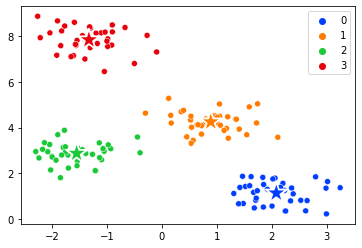

[[ 2.08356978  1.13724593]
 [ 0.88922686  4.24805239]
 [-1.55311219  2.87260114]
 [-1.32931949  7.83606554]]


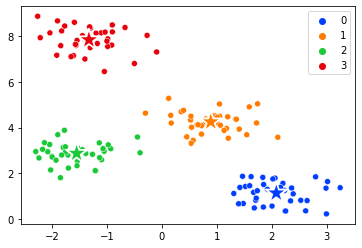


Final SSE: 70.84088742368904


In [31]:
clustering = ATCS_KMeans(points, 4, nbInit = 10)
clustering.cluster_points(True)
clustering.draw_state()
print("\nFinal SSE:", clustering.calculate_SSE())

### 3.2. KMeans++

Iteration:  0
SSE: 543.5499535788538
SSE: 262.4693709461172
SSE: 179.30544749522355
SSE: 120.49950630725249
SSE: 99.35919611291126
SSE: 89.41049090923435
SSE: 83.91052466709624
SSE: 80.54419143449556
SSE: 78.33217727786992
SSE: 76.80010764902684
SSE: 75.69489554122666
SSE: 74.8713017504282
SSE: 74.24106744334959
SSE: 73.7480203584635
SSE: 73.35501677118421
SSE: 73.03669303720902
SSE: 72.77524772341965
SSE: 72.5578871787419
SSE: 72.37522449099502
SSE: 72.22024560958877
SSE: 72.0876240045364
SSE: 71.97325571260595
SSE: 71.87393731334109
SSE: 71.787138721965
SSE: 71.71084017453502
SSE: 71.64341347877803
SSE: 71.58353430411711
SSE: 71.53011657107423
SSE: 71.48226279666315
SSE: 71.4392261093907
SSE: 71.40038090097933
SSE: 71.36519994088628
SSE: 71.33323637657573
SSE: 71.3041094626581
SSE: 71.27749316135967
SSE: 71.25310697246584
SSE: 71.23070850792115
SSE: 71.21008744174762
SSE: 71.19106055164012
SSE: 71.1734676327595
SSE: 71.15716811267133
SSE: 71.14203823321601
SSE: 71.12796869332685
SSE:

SSE: 271.8651437458271
SSE: 271.75706641025374
SSE: 271.66004332524597
SSE: 271.5726149337837
SSE: 271.4935551543411
SSE: 271.421827900707
SSE: 271.35655277539996
SSE: 271.29697778681845
SSE: 271.24245749161526
SSE: 271.19243536217795
SSE: 271.1464294700231
SSE: 271.1040207904685
SSE: 271.0648435936056
SSE: 271.0285775064814
SSE: 270.9949409221208
SSE: 270.9636855002242
SSE: 270.93459155753675
SSE: 270.90746418701434
SSE: 270.8821299769332
SSE: 270.85843422618274
SSE: 270.83623857174877
SSE: 270.8154189600708
SSE: 270.7958639064406
SSE: 270.77747299660854
SSE: 270.76015559281694
SSE: 270.74382971297973
SSE: 270.7284210570187
SSE: 270.71386215867
SSE: 270.70009164461703
SSE: 270.6870535856913
SSE: 270.67469692729617
SSE: 270.66297498817954
SSE: 270.6518450183399
SSE: 270.64126780822005
SSE: 270.6312073425009
SSE: 270.6216304927671
SSE: 270.61250674413503
SSE: 270.6038079516207
SSE: 270.5955081226037
SSE: 270.58758322224105
SSE: 270.5800109991055
SSE: 270.5727708286787
SSE: 270.565843572

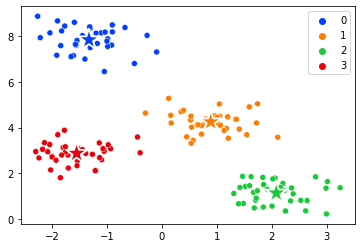

[[-1.32931949  7.83606554]
 [ 0.88922686  4.24805239]
 [ 2.08356978  1.13724593]
 [-1.55311219  2.87260114]]


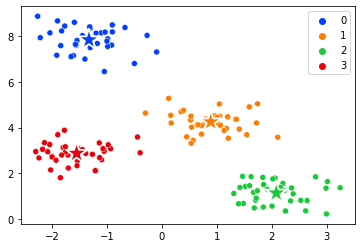

In [32]:
clustering = ATCS_KMeans(points, 4, init = '++')
clustering.cluster_points(verbose = True)
clustering.draw_state()

### 3.3. Multiple Initializations and KMeans++

Iteration:  0
SSE: 575.260951987314
SSE: 277.9611371704226
SSE: 275.3218743790331
SSE: 273.0635898358258
SSE: 272.0498696596207
SSE: 270.9169264684522
SSE: 269.7596996063566
SSE: 268.95377572355903
SSE: 268.01075371922286
SSE: 267.2183355618249
SSE: 266.45263552523284
SSE: 265.6668821930362
SSE: 264.5745183546352
SSE: 263.53723356283444
SSE: 262.33048803526464
SSE: 261.3732132092625
SSE: 260.5778190919697
SSE: 259.86925518851
SSE: 259.1666858257374
SSE: 258.38066946627174
SSE: 257.49615185395356
SSE: 256.51982060684935
SSE: 255.24716250682744
SSE: 253.89939812991702
SSE: 252.55308758464793
SSE: 250.64421505838413
SSE: 248.31551412241848
SSE: 245.48918103818824
SSE: 242.60783522040964
SSE: 239.9055975969322
SSE: 236.7422064948479
SSE: 233.18731421569325
SSE: 229.7694922673851
SSE: 226.31011523782064
SSE: 222.73502572046428
SSE: 219.3450574140812
SSE: 216.0631697250688
SSE: 212.87955536749138
SSE: 209.45291767491935
SSE: 205.09121961503112
SSE: 200.88529053936045
SSE: 196.3838162143977
S

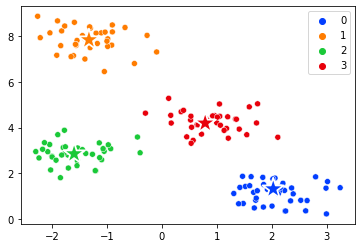

[[ 2.02732571  1.31789828]
 [-1.32931949  7.83606554]
 [-1.59948169  2.85120329]
 [ 0.78771411  4.19319844]]


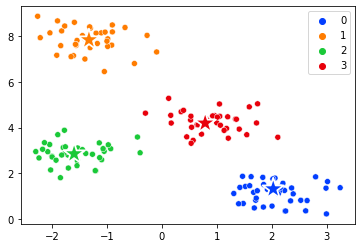


Final SSE: 72.80365699573186


In [33]:
clustering = ATCS_KMeans(points, 4, init = '++', nbInit = 3)
clustering.cluster_points(verbose = True)
clustering.draw_state()
print("\nFinal SSE:", clustering.calculate_SSE())

## 4. Determine the Number of Clusters

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


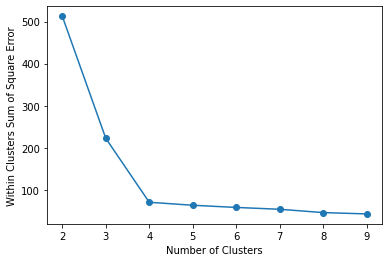

In [34]:
Ks = range(2, 10)
SSEs = []
for k in Ks:
    clustering = ATCS_KMeans(points, k, init = '++', nbInit = 3, tolerance = 0.001, maxIter = 100)
    clustering.cluster_points(False)
    SSEs.append(clustering.calculate_SSE())
# Plot the SSE vs the number of cluster centers
plt.figure()
plt.plot(Ks, SSEs, marker = "o")
plt.xlabel("Number of Clusters")
plt.ylabel("Within Clusters Sum of Square Error")
plt.savefig("SSEs.jpg")
plt.show()

## 5. Drawbacks
### 5.1. Elongated Clusters

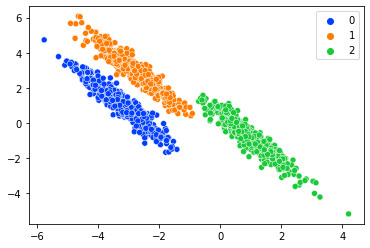

In [35]:
import numpy as np
points, categories = make_blobs(n_samples = 1500, centers = 3, random_state = 170)
# Transform the points to elongate the blobs
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
points = np.dot(points, transformation)
# Plot the points
ax = sns.scatterplot(x = points[:,0], y = points[:,1], hue = categories, palette = 'bright')
plt.show()

[[-2.60547642  0.85109683]
 [ 1.03141992 -0.92798602]
 [-3.32486547  3.11524073]]


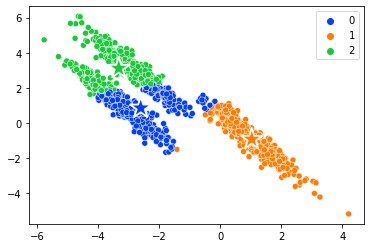


Final SSE: 1899.2150363859253


In [36]:
clustering = ATCS_KMeans(points, 3, init = '++', nbInit = 10)
clustering.cluster_points()
clustering.draw_state()
print("\nFinal SSE:", clustering.calculate_SSE())

### 5.2. Unequal Variance

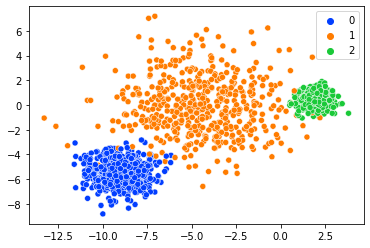

In [37]:
points, categories = make_blobs(n_samples = 1500, cluster_std = [1.0, 2.5, 0.5], random_state = 170)
ax = sns.scatterplot(x = points[:,0], y = points[:,1], hue = categories, palette = 'bright')
plt.show()

[[ 1.63792204  0.44032524]
 [-8.87002214 -5.36599917]
 [-4.91273596  0.11770247]]


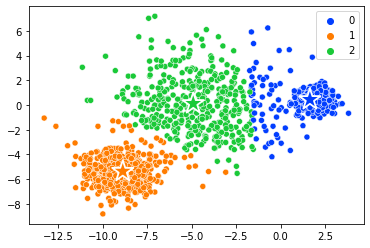


Final SSE: 5748.007767970245


In [38]:
clustering = ATCS_KMeans(points, 3, init = '++', nbInit = 10)
clustering.cluster_points()
clustering.draw_state()
print("\nFinal SSE:", clustering.calculate_SSE())

### 5.3. Unequal Size Clusters

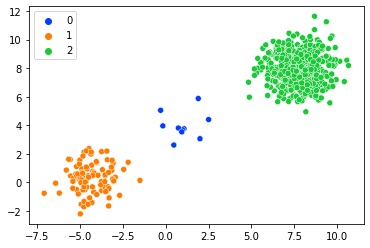

In [39]:
points, categories = make_blobs(n_samples = [10, 100, 500], cluster_std = 1.0, random_state = 3)
ax = sns.scatterplot(x = points[:,0], y = points[:,1], hue = categories, palette = 'bright')
plt.show()

[[ 7.90684504  8.95232457]
 [ 7.62542414  7.29037462]
 [-3.94696275  0.55818504]]


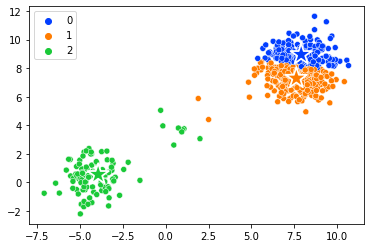


Final SSE: 1210.6680991629753


In [40]:
clustering = ATCS_KMeans(points, 3, init = '++', nbInit = 10)
clustering.cluster_points()
clustering.draw_state()
print("\nFinal SSE:", clustering.calculate_SSE())